# VisualMIDIcompare

A testing and analysis workflow


## Provide:

- [Spectrogram](https://en.wikipedia.org/wiki/Spectrogram)
- ability to play MIDI files to compare
- ability to convert to .wav using existing tools

Tool to generate a visual representation of a MIDI file. 
Optionally, compare to a second MIDI file by diffing the images

### Steps:

1. Length of the MIDI file (x-axis of image).
2. 88 Keys (y-axis of image).
3. Plot each note on the image.
4. Grayscale to measure velocity (MIDI has 128 levels?)
5. Comparision emphasizes:
	1. notes with no match
	2. notes with differnet on/off points
	3. notes with different velocity

### Reason: 

MIDI is a digitial format and can fairly straightforwaly be done numerically. This is not broadly useful to people. 

Existing MIDI editors have a visual editor but it is manual process to extract and line up images, and diff them.

## Implementation:

- Python (jupyter notebook) 
- use the same diff rules and colour as github.
- command line tool

## Optional:

1. Add numeric comparisions
	- summary statistcs
	- note statistics
2. An interface where you can hover over images and get MIDI details
3. Choose output iamge format.
4. Choose to wrap the image (it will be a long image by default)
5. web interface
6. Chouse y-axis scale. Default will be 10px per 1/4 note.




In [4]:
from __future__ import print_function

In [5]:
# Librosa Imports
import librosa
import librosa.display
import IPython.display
import numpy as np

In [6]:
# Matplotlib Imports
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# Source1 Track

In [79]:
# Source1 Audio Path
source1_audio_path = 'source/source1.wav'

# Load source1 track
y, sr = librosa.load(source1_audio_path)

# Play back original track
IPython.display.Audio(data=y, rate=sr)

# Source 2 Track

In [78]:
# Source2 Audio Path
source2_audio_path = 'source/source2.wav'

# Load source2 track
y2, sr2 = librosa.load(source2_audio_path)

# Play back original track
IPython.display.Audio(data=y, rate=sr)

# Prepare Source1 Track

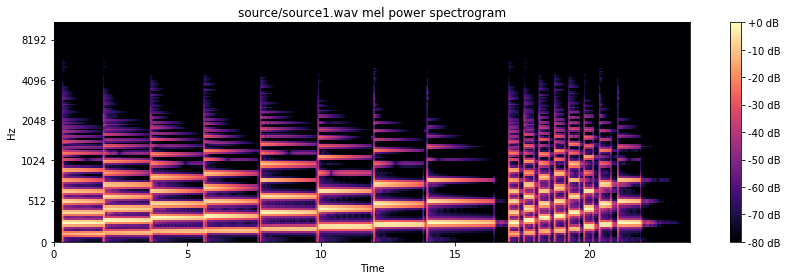

In [67]:
# mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# covert to log scale (dB). Using peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Prepare the graph
plt.figure(figsize=(12,4))

# Display spectrogram on a mel scale
# smaple rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Give it a title
plt.title(original_audio_path + " mel power spectrogram")

# draw a colour bar
plt.colorbar(format='%+02.0f dB')

# Plot
plt.tight_layout()

# Prepare Source2 Track

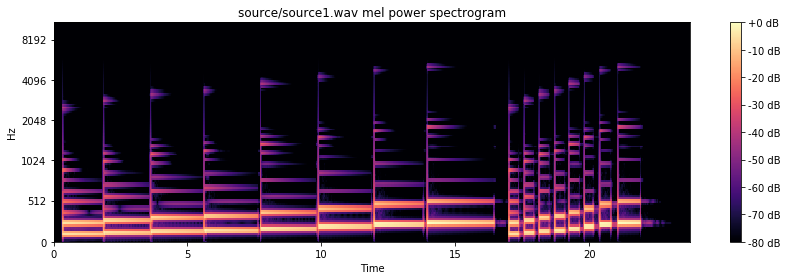

In [76]:
# mel-scaled power (energy-squared) spectrogram
S2 = librosa.feature.melspectrogram(y2, sr=sr2, n_mels=128)

# covert to log scale (dB). Using peak power (max) as reference.
log_S2 = librosa.power_to_db(S2, ref=np.max)

# Prepare the graph
plt.figure(figsize=(12,4))

# Display spectrogram on a mel scale
# smaple rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S2, sr=sr2, x_axis='time', y_axis='mel')

# Give it a title
plt.title(original_audio_path + " mel power spectrogram")

# draw a colour bar
plt.colorbar(format='%+02.0f dB')

# Plot
plt.tight_layout()

# Chromagram Testing on S1

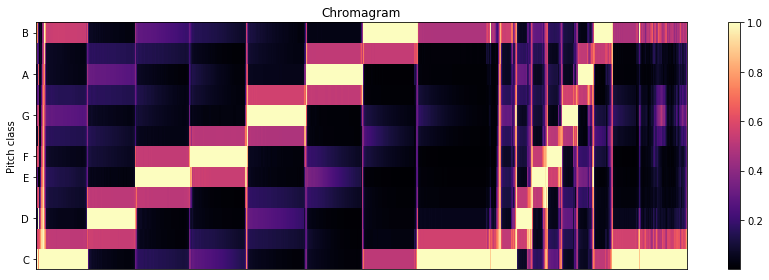

In [68]:
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.figure(figsize=(12,4))
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

# Constant-Q Testing on S1

Text(0.5, 1.0, 'Constant-Q power spectrogram note')

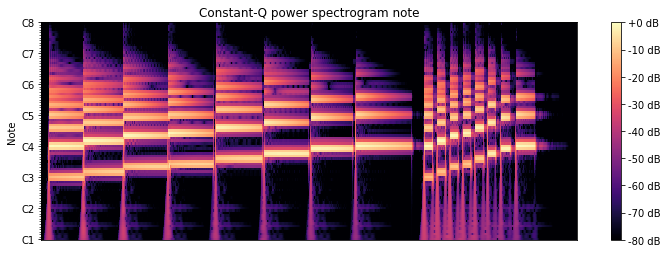

In [70]:
CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram note')

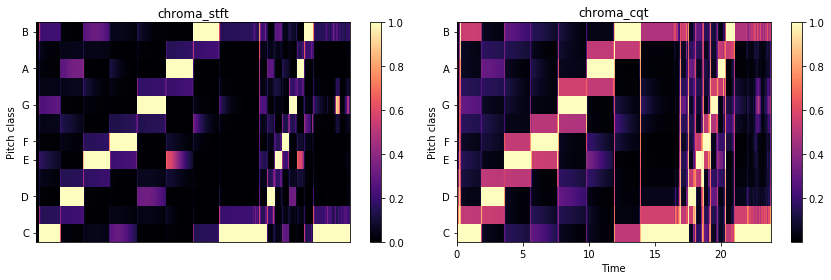

In [71]:
>>> chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr,
...                                           n_chroma=12, n_fft=4096)
>>> chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

>>> plt.figure(figsize=(12,4))
>>> plt.subplot(1,2,1)
>>> librosa.display.specshow(chroma_stft, y_axis='chroma')
>>> plt.title('chroma_stft')
>>> plt.colorbar()
>>> plt.subplot(1,2,2)
>>> librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
>>> plt.title('chroma_cqt')
>>> plt.colorbar()
>>> plt.tight_layout()

# Compare source1 and source2 Chromagram

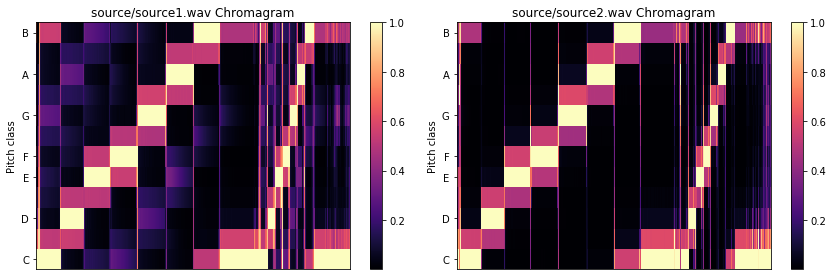

In [80]:
C = librosa.feature.chroma_cqt(y=y, sr=sr)
C2 = librosa.feature.chroma_cqt(y=y2, sr=sr2)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title(source1_audio_path + ' Chromagram')
plt.subplot(1,2,2)
librosa.display.specshow(C2, y_axis='chroma')
plt.colorbar()
plt.title(source2_audio_path + ' Chromagram')
plt.tight_layout()